*Hello Everyone.This is the notebook of the python ,in this notebook I am going to do portfolio optimization of assets under different risk profiles with the famous monte carlo simulation,I have provided each step's proper description,in this notebook.Lets Start!!*

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

Here I am using assets of multiple class like different companies stocks,gold etc for monte carlo simulation from 2020-01-01 to 2023-09-09. I will use adjusted close price of that assets ,this dataset is downloaded from famous yahoo finance ,and store them in assets variable

# **Dataset Download**

In [ ]:
assets=yf.download(['PLAY','EL','PYPL','GOOGL','DDOG','PG','GLD'],start='2020-01-01',end='2023-09-09')['Adj Close']
assets.head()

[*********************100%%**********************]  7 of 7 completed


,DDOG,EL,GLD,GOOGL,PG,PLAY,PYPL
Date,,,,,,,
2020-01-02,36.700001,199.369980,143.949997,68.433998,111.796608,40.521248,110.750000
2020-01-03,37.419998,197.862106,145.860001,68.075996,111.044701,40.322029,108.760002
2020-01-06,39.900002,200.433289,147.389999,69.890503,111.198708,40.222420,110.169998
2020-01-07,40.060001,199.167023,147.970001,69.755501,110.510246,40.102886,109.669998
2020-01-08,39.950001,200.781219,146.860001,70.251999,110.981308,40.840000,111.820000


you can see different statistical data for the particular time interval for different companie's adjusted close price ,you can see from below that PYPL has the most standard deviation among all companies,we all know that here we have to assume that returns are normally distributed,because we want to apply Monte Carlo Simulation on that returns,which is an important assumption in this case,
as a result we can say that here this standard deviation is important measure for the risk,because as standard devaiation increases,the fluctuations in the stock price also changes which is shown below in lineplot

In [ ]:
assets.describe()

,DDOG,EL,GLD,GOOGL,PG,PLAY,PYPL
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,97.731293,245.150406,169.862511,105.651420,133.043537,33.977057,152.431924
std,33.417946,51.881177,10.022587,24.871216,14.296721,10.492661,76.641699
min,28.959999,139.911865,138.039993,52.706501,89.031868,4.870000,58.599998
25%,78.225002,201.958054,163.622501,86.994377,125.381590,31.935000,80.374998
50%,93.579998,243.359291,169.650002,105.552502,134.038620,36.705000,119.605000
75%,110.244997,285.234818,177.842499,125.626625,144.708553,41.245001,215.887497
max,196.559998,364.432159,193.889999,149.838501,157.220627,49.910000,308.529999


Below is the lineplot of adjacent price all comapanies in the asset over the given period, from plot you can say PLAY, GOOGLE has very small std,as a result very less fluctuations in the price,on the other hand EL ,PYPL have very large std compare to others.

<Axes: xlabel='Date'>

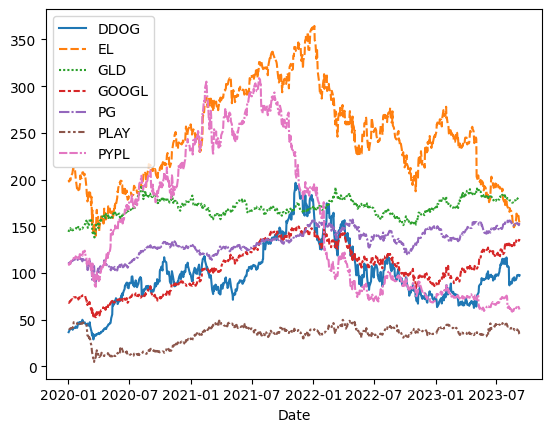

In [ ]:
sns.lineplot(assets)

# **Calculating log returns values and their statistical parameters**

We can use percentage returns here,but in finance log returns is prefered over the log returns ,because the log returns are additive.

In [ ]:
# calculation of the log returns
assets_returns=np.log(assets/assets.shift(1))
assets_returns.dropna(inplace=True)# dropping the first row of NAN
cov=assets_returns.cov()# covariance matrix
#calculation of percentage returns
assets_returns2=assets.pct_change()
assets_returns2.dropna(inplace=True)

In [ ]:
assets_returns# showing of log returns

,DDOG,EL,GLD,GOOGL,PG,PLAY,PYPL
Date,,,,,,,
2020-01-03,0.019428,-0.007592,0.013181,-0.005245,-0.006748,-0.004929,-0.018132
2020-01-06,0.064171,0.012911,0.010435,0.026305,0.001386,-0.002473,0.012881
2020-01-07,0.004002,-0.006338,0.003927,-0.001933,-0.006211,-0.002976,-0.004549
2020-01-08,-0.002750,0.008072,-0.007530,0.007092,0.004254,0.018214,0.019415
2020-01-09,0.006487,0.020207,-0.005668,0.010443,0.010878,0.008533,0.006685
...,...,...,...,...,...,...,...
2023-09-01,0.012873,0.007262,0.000500,-0.003752,0.001101,0.010890,0.016815
2023-09-05,0.002759,-0.003904,-0.008195,0.000811,-0.013488,-0.045609,0.002671
2023-09-06,-0.003475,-0.028272,-0.004545,-0.009696,-0.001970,-0.014072,-0.014857


In [ ]:
assets_returns2# showing of the percentage returns

,DDOG,EL,GLD,GOOGL,PG,PLAY,PYPL
Date,,,,,,,
2020-01-03,0.019618,-0.007563,0.013269,-0.005231,-0.006726,-0.004916,-0.017968
2020-01-06,0.066275,0.012995,0.010490,0.026654,0.001387,-0.002470,0.012964
2020-01-07,0.004010,-0.006318,0.003935,-0.001932,-0.006191,-0.002972,-0.004538
2020-01-08,-0.002746,0.008105,-0.007502,0.007118,0.004263,0.018381,0.019604
2020-01-09,0.006508,0.020412,-0.005652,0.010498,0.010938,0.008570,0.006707
...,...,...,...,...,...,...,...
2023-09-01,0.012956,0.007288,0.000500,-0.003745,0.001101,0.010950,0.016957
2023-09-05,0.002763,-0.003896,-0.008162,0.000811,-0.013397,-0.044584,0.002674
2023-09-06,-0.003469,-0.027876,-0.004534,-0.009649,-0.001968,-0.013973,-0.014747


Now lets see ,how log returns are additve whether percentage returns are not,
lets take first 3 days returns of EL asset if [ EL(day1_return) + EL(day2_return)=EL(day3_return wrt 1st day stock price) ].Lets check it.

In [ ]:
assets_returns_sum_el=assets_returns['EL'][0]+assets_returns['EL'][1]# calculation of sum of log returns of first 2 days
assets_returns_sum_el2=assets_returns2['EL'][0]+assets_returns2['EL'][1]# calculation of sum of percentage returns of first 2 days
assets_returns_actual=((assets['EL'][2]/(assets['EL'][0]))-1)# calculation of the actual return wrt to 1st day stock price on 3rd day

Here you can see the log returns are more closer to the actual return than the percentage returns,below I show that thing using condition

In [ ]:
if(np.abs(assets_returns_actual-assets_returns_sum_el)<np.abs(assets_returns_actual-assets_returns_sum_el2)):
  print('log returns are additive and more accurate')
else:
  print('percentage returns are additive and more accurate')

log returns are additive and more accurate


***UnderStanding of the Covariance Matrix:
***
Covariance Matrix Overview:
In finance, a covariance matrix represents the relationships between the returns of different assets within a portfolio. Each element of the matrix corresponds to the covariance between two assets. Here's a simple explanation:

Diagonal Elements (variances): The diagonal elements of the covariance matrix represent the variances of individual assets. They show how much an asset's returns deviate from their mean value. A larger variance indicates greater risk.

Off-Diagonal Elements (covariances): The off-diagonal elements represent the covariances between pairs of assets. Covariance measures how two assets move together. A positive covariance means they tend to move in the same direction, while a negative covariance implies they move in opposite directions.

In [ ]:
#Showing the covariance matrix of assets_returns
cov

,DDOG,EL,GLD,GOOGL,PG,PLAY,PYPL
DDOG,0.001597,0.000360,0.000052,0.000399,0.000083,0.000540,0.000633
EL,0.000360,0.000546,0.000022,0.000276,0.000149,0.000484,0.000351
GLD,0.000052,0.000022,0.000099,0.000027,0.000017,0.000036,0.000036
GOOGL,0.000399,0.000276,0.000027,0.000458,0.000126,0.000420,0.000366
PG,0.000083,0.000149,0.000017,0.000126,0.000203,0.000088,0.000135
PLAY,0.000540,0.000484,0.000036,0.000420,0.000088,0.003431,0.000525
PYPL,0.000633,0.000351,0.000036,0.000366,0.000135,0.000525,0.000942


In [ ]:
assets_mean=assets_returns.mean()
assets_mean
assets_std=assets_returns.std()# std of returns(sigma)
assets_std
assets_mean=252*assets_mean# annualized the mean returns of assets=> 252 trading days in a year(mu)
assets_mean

DDOG     0.266059
EL      -0.070193
GLD      0.057840
GOOGL    0.187457
PG       0.083458
PLAY    -0.042160
PYPL    -0.162218
dtype: float64

In [ ]:
assets_s0=assets.iloc[-1]# stroring the latest adjacent price of the assets(S0)
assets_s0

DDOG      97.660004
EL       154.000000
GLD      178.080002
GOOGL    136.380005
PG       151.970810
PLAY      34.700001
PYPL      60.980000
Name: 2023-09-08 00:00:00, dtype: float64

# **Monte Carlo Model for generating future stock prices/returns**
*Monte Carlo Simulation is the repeated sampling of the random variables.Here we use the famous geometric brownian movement to create the possible sample paths ,the equation which is used here is
     dS(t)=(mu)dt+(sigma)dw
     =>S(t)=S(0)exp(r)
     where r=(mean-var/2)t+(std)normal.rand(0,1),
     S(t)=stock price at time t,
     S(0)=stock price at t=0,
     mu=drift,
     sigma=std*
     

In [ ]:

def mcs(initial_price, annual_return, volatility, days, simulations):
    dt = 1 / 252  # Trading days per year (252)
    daily_returns = np.exp((annual_return - 0.5 * volatility ** 2) * dt + volatility * np.sqrt(dt) * np.random.randn(days, simulations))

    # Create an array to store simulated stock prices
    price_matrix = np.zeros_like(daily_returns)
    price_matrix[0] = initial_price

    for t in range(1, days):
        price_matrix[t] = price_matrix[t - 1] * daily_returns[t]

    return price_matrix



Plotting the results of a stock to get the famous frontier plot of the future stock prices

In [ ]:
simulated_prices=mcs(assets_s0['EL'],assets_mean['EL'],assets_std['EL'],50,1000)
def plot(S):
 plt.figure(figsize=(21, 9))
 plt.title('Monte Carlo Simulation of Stock Prices')
 plt.xlabel('Trading Days')
 plt.ylabel('Stock Price')
 for i in range(1000):
    plt.plot(S[:, i])
 plt.grid(True)
 plt.show()

Here I plot the results of the EL stock

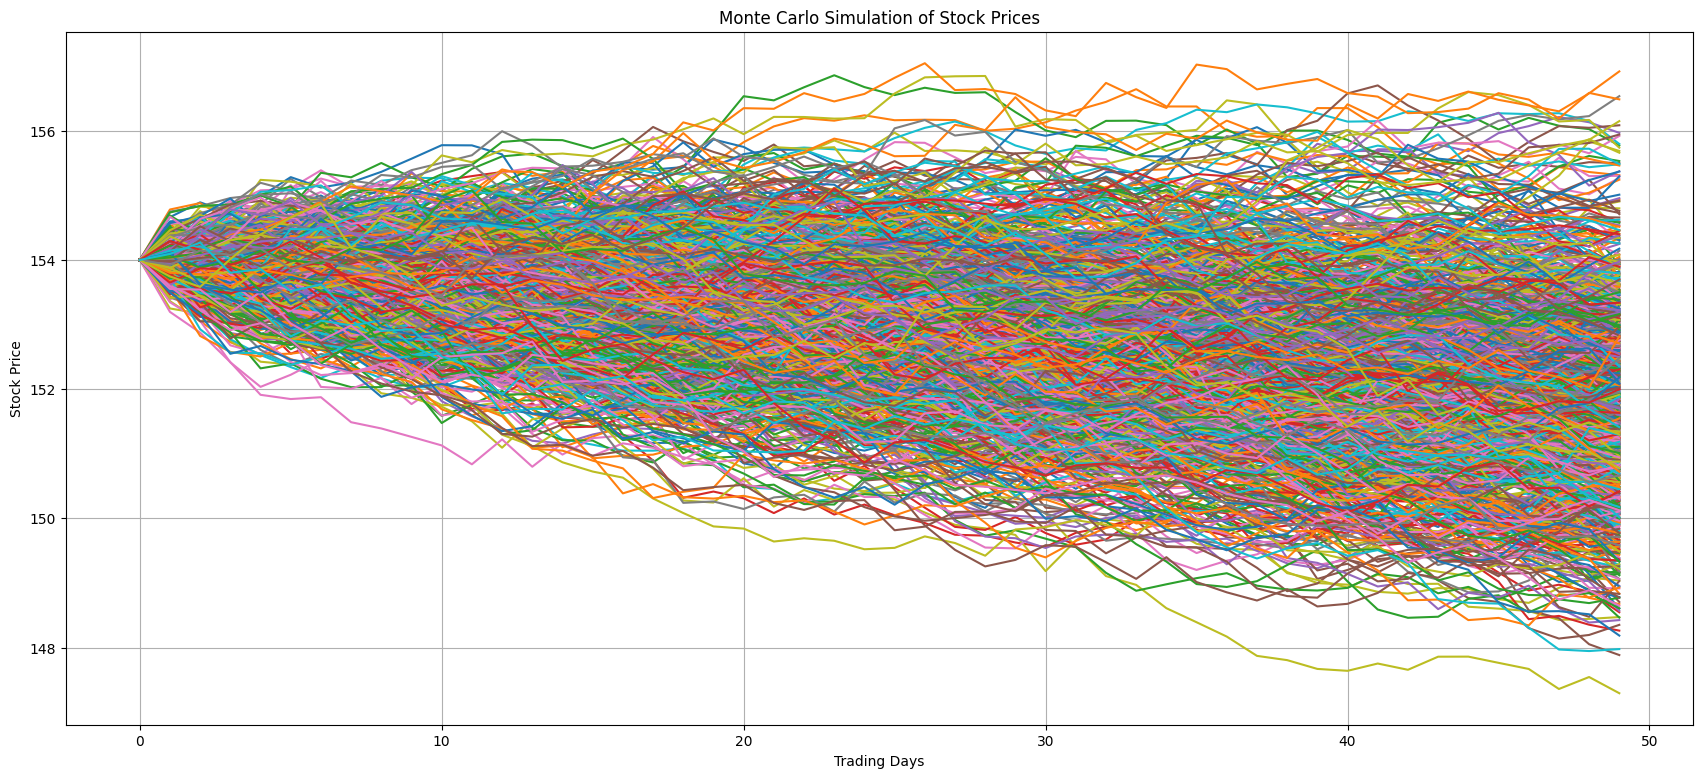

In [ ]:
plot(simulated_prices)



Till now we completed the first task of our project which is generation of the future return scenarios using monte carlo simulation model,we also run it on our EL stock of our asset.Now comes the most important part of this project which is portfolio optimization ,basically allot optimized weights to our asset of containing 7 different classes according to different risk profiles,and also find the other optimized parameters.

Here I am going to use sharp ratio concept for getting the optimized weights & parameters,using random weights and std of the assets we get the std of the portfolio ,and  similarly the expected return but in the calculation of expected return here comes a new concept called risk seeking factor which signifies the ability/willingness of the investor to take risk in the fucctuating market to get the maximum profit.More the risk seeeking factor more signifies the ability of investor to take the risk,its modifies the expected return of portfolio which is

*E=Sum(ret(i)*W(i))+risk_seeking_factor**variance_of_return_of_portfolio*

In the below mcp function the risk seeking factor is risk,now after the lots of simulation we get the optimzed weights ,maximized expected returns,minimum risk corresponding to maximum sharp ratio.

 Here I have taken different risk free rates of respective 3 countries like USA, India, Ukraine. Here i assuming if risk free rate is above 10% than it is bear market, otherwise bull market, though it is just an assumption ,the categorization of market depends on various complex factors.

# **Portfolio Optimzation With Monte Carlo Simulation**

In [ ]:
def mcp(mean_returns,cov_returns,num_simulations,risk,risk_free_rate):
  risk=float(risk)
  all_weights=np.zeros((num_simulations,len(mean_returns)))
  ret_arr=np.zeros(num_simulations)
  vol_arr=np.zeros(num_simulations)
  vol_arr2=np.zeros(num_simulations)
  sharp_arr=np.zeros(num_simulations)
  for i in range(num_simulations):
    weights=np.random.random((7))# weights randomized generation
    weights=weights/np.sum(weights)# making them fractional weights such that their sum is equal to 1
    all_weights[i,:]=weights#storing the weights
  # all required arrays to store all the generated weights,returns,volatility,sharp-ratio(std)

    vol_arr[i]=np.sqrt(np.dot(weights.T,np.dot(cov_returns*252,weights)))# calculating portfolios std using weights and std of the asset classes
    vol_arr2[i]=risk*(vol_arr[i])*(vol_arr[i])
    ret_arr[i]=np.sum(mean_returns*weights)+risk*(vol_arr[i])*(vol_arr[i])# calculating portfolios return using weights and return of the asset classes and the risk aversion factor
    if(risk_free_rate=='India'):
     sharp_arr[i]=(ret_arr[i]-0.062)/vol_arr[i]# sharp ratio calculation for a bull market
    elif(risk_free_rate=='Ukraine'):
      sharp_arr[i]=(ret_arr[i]-0.306)/vol_arr[i] # sharp ratio calculation for a bear market
    elif(risk_free_rate=='USA'):
      sharp_arr[i]=(ret_arr[i]-0.016)/vol_arr[i]# sharp ratio calculation for a bull market


  a=sharp_arr.argmax() # storing the index of the maximum sharp_ratio portfolio
  return a,all_weights[a,:],sharp_arr[a],np.sqrt(vol_arr2[a]),ret_arr[a],ret_arr,np.sqrt(vol_arr2),sharp_arr,all_weights

Creating a scatter plot to see the different combination of assets using different weights

In [ ]:
def plot2(a,vol_arr,ret_arr,sharp_arr):
  max_sr_ret = ret_arr[a]
  max_sr_vol = vol_arr[a]
  plt.figure(figsize=(21,9))
  plt.scatter(vol_arr,ret_arr,c=sharp_arr,cmap='plasma')
  plt.savefig('scatterplot.png')
  plt.colorbar(label='Sharpe Ratio')
  plt.xlabel('Volatility')
  plt.ylabel('Return')
# Add red dot for max SR
  plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')


A trial of the monte carlo portfolio optimization and its plot with testcase

In [ ]:
position_max_sharp_,optimal_weights,max_sharp_ratio,expected_risk,expected_return,all_returns,all_risk,all_sharp_ratio,all_weights=mcp(assets_mean,cov,1000,0.3,'USA')
expected_return

0.17172860475513907

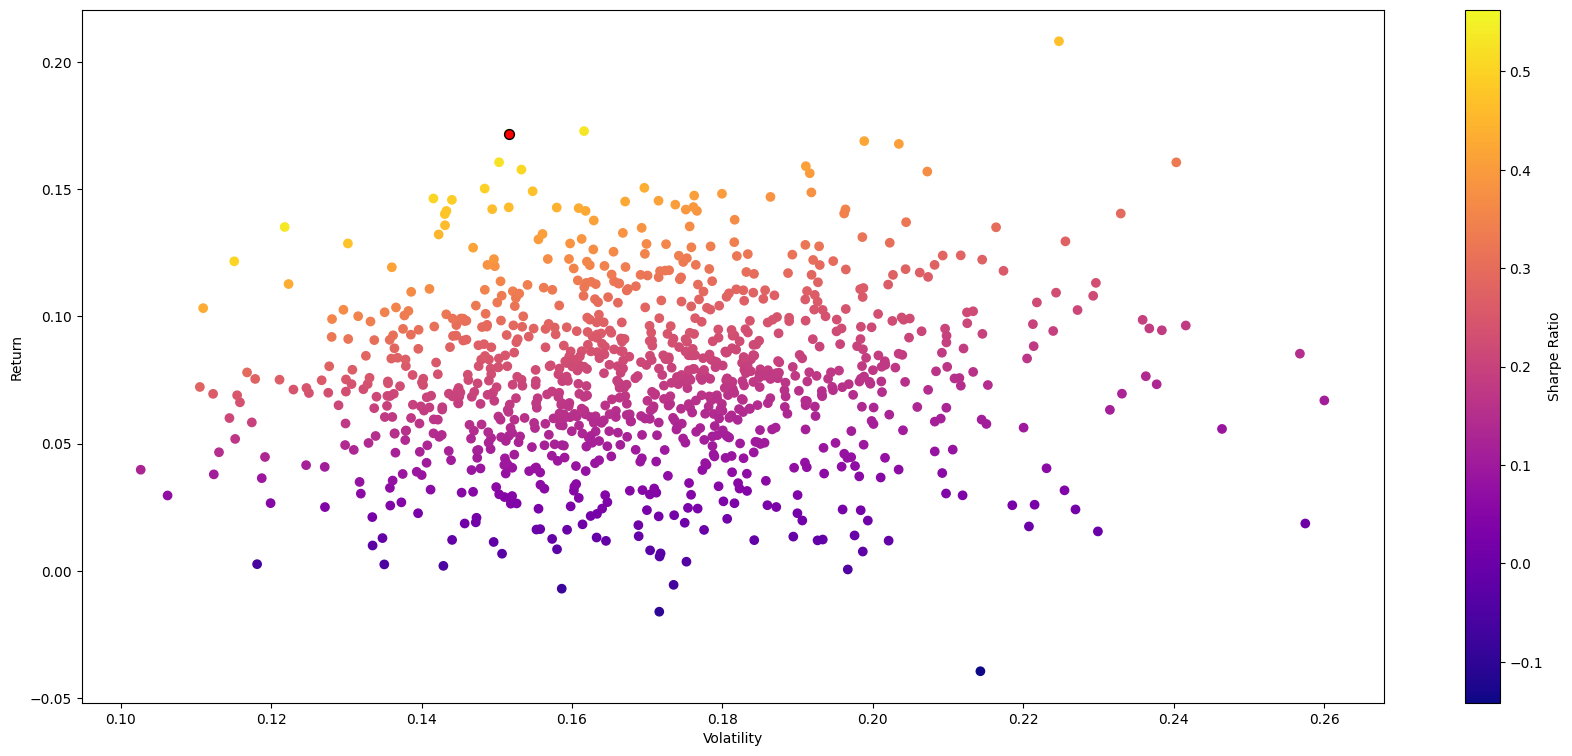

In [ ]:
plot2(position_max_sharp_,all_risk,all_returns,all_sharp_ratio)

# **Relationship of Different Risk Metrics With Risk Seeking Factor**

1. ***Generation of risk metrics on the basis of 40 different risk seeking factor:***
Here the number of simulations for monte carlo is 1000 ,under different market conditions of 3 countries (India,USA,Ukraine)

In [ ]:
arr2=np.zeros(40)
arr3=np.zeros(40)
arr1=np.zeros(40)
arr4=np.zeros((40,7))
for i in range(0,40):
 position_max_sharp_,optimal_weights,max_sharp_ratio,expected_risk,expected_return,all_returns,all_risk,all_sharp_ratio,all_weights=mcp(assets_mean,cov,1000,i/40,'USA')
 arr2[i]=(expected_return)
 arr3[i]=(expected_risk)
 arr1[i]=(max_sharp_ratio)
 arr4[i,:]=(optimal_weights)

In [ ]:
arr22=np.zeros(40)
arr32=np.zeros(40)
arr12=np.zeros(40)
arr42=np.zeros((40,7))
for i in range(0,40):
 position_max_sharp_,optimal_weights,max_sharp_ratio,expected_risk,expected_return,all_returns,all_risk,all_sharp_ratio,all_weights=mcp(assets_mean,cov,1000,i/40,'India')
 arr22[i]=(expected_return)
 arr32[i]=(expected_risk)
 arr12[i]=(max_sharp_ratio)
 arr42[i,:]=(optimal_weights)

In [ ]:
arr23=np.zeros(40)
arr33=np.zeros(40)
arr13=np.zeros(40)
arr43=np.zeros((40,7))
for i in range(0,40):
 position_max_sharp_,optimal_weights,max_sharp_ratio,expected_risk,expected_return,all_returns,all_risk,all_sharp_ratio,all_weights=mcp(assets_mean,cov,1000,i/40,'Ukraine')
 arr23[i]=(expected_return)
 arr33[i]=(expected_risk)
 arr13[i]=(max_sharp_ratio)
 arr43[i,:]=(optimal_weights)

 Now ,categorizing the investors on different risk profiles as aggressive,moderate,conservative is very subjective,risk profiles helps us to recognize the investor that how much he wants to take the risk in the stock market to gain profit,now on the basis of the risk aversion factor we are going to see how the different parameters like expected_volatility,expected_return,max_sharp_ratio ,optimal weights going to change.

***Graphical Representation :***

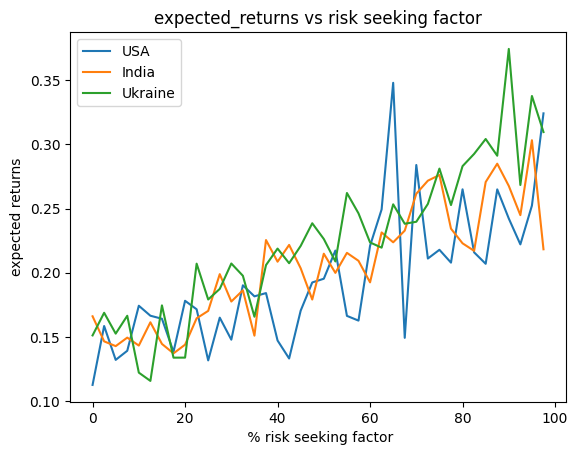

In [ ]:
x_labels =np.arange(0, len(arr2))*2.5
x_labels2 =np.arange(0, len(arr22))*2.5
x_labels3 =np.arange(0, len(arr23))*2.5
# Create the line plot
sns.lineplot(x=x_labels, y=arr2,label='USA')
sns.lineplot(x=x_labels2, y=arr22,label='India')
sns.lineplot(x=x_labels3, y=arr23,label='Ukraine')
# Customize the plot labels and title
plt.xlabel(' % risk seeking factor')
plt.ylabel('expected returns')
plt.title('expected_returns vs risk seeking factor')
# Show the plot
plt.show()

As expected the risk if increases , the expected returns is also increases, but there is an amazing thing to observe , though the ukraine has the higher risk free rate, finally at higher risk the expected return is maximum than among 2 other bull market conditions

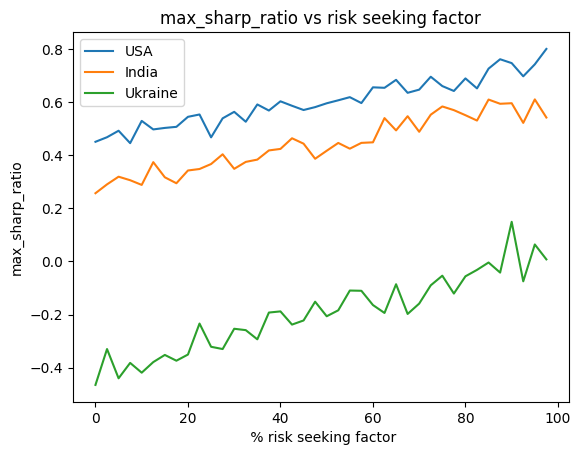

In [ ]:
x_labels =np.arange(0, len(arr1))*2.5
x_labels2 =np.arange(0, len(arr12))*2.5
x_labels3=np.arange(0, len(arr13))*2.5
# Create the line plot
sns.lineplot(x=x_labels, y=arr1,label='USA')
sns.lineplot(x=x_labels2, y=arr12,label='India')
sns.lineplot(x=x_labels3, y=arr13,label='Ukraine')
# Customize the plot labels and title
plt.xlabel(' % risk seeking factor')
plt.ylabel('max_sharp_ratio')
plt.title('max_sharp_ratio vs risk seeking factor')

# Show the plot
plt.show()

We can see from the above plot that as the risk factor increases  the maximum sharp ratio both increases, and also under the more bullish market conditions the final value of  max sharp ratio is higher under same risk ,but here you can see that under the bear market conditions ,means if risk free rate is higher then the velocity of increasing max_sharp_ratio is more than the others bull markets

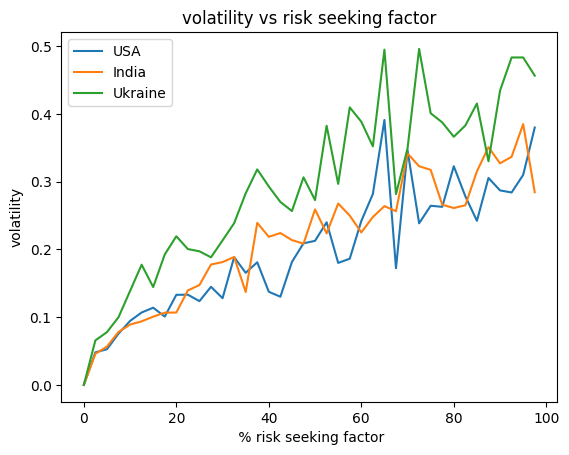

In [ ]:
x_labels =np.arange(0, len(arr3))*2.5
x_labels2 =np.arange(0, len(arr32))*2.5
x_labels3 =np.arange(0, len(arr33))*2.5
# Create the line plot
sns.lineplot(x=x_labels, y=arr3,label='USA')
sns.lineplot(x=x_labels2, y=arr32,label='India')
sns.lineplot(x=x_labels3, y=arr33,label='Ukraine')
# Customize the plot labels and title
plt.xlabel(' % risk seeking factor')
plt.ylabel('volatility')
plt.title('volatility vs risk seeking factor')

# Show the plot
plt.show()

very obvious as risk increases the volatility increases, also as well as definition of maarket conditions the bear market has the highest volatility corresponding to the same risk.

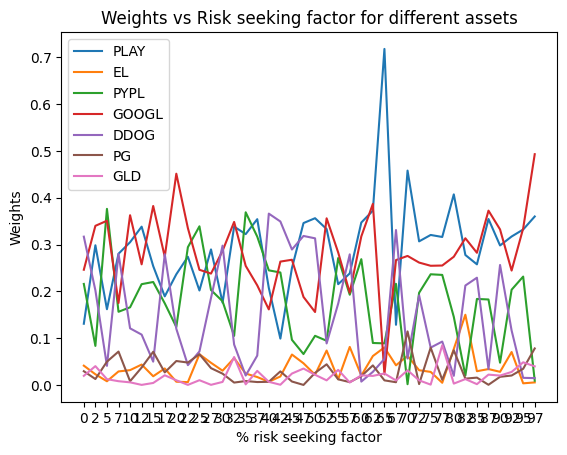

In [ ]:
x_labels = [str(int(i * 2.5)) for i in range(arr4.shape[0])]

# Label the columns
y_labels =['PLAY','EL','PYPL','GOOGL','DDOG','PG','GLD']
# Create a heatmap
for i in range(arr4.shape[1]):
    sns.lineplot(x=x_labels, y=arr4[:, i], label=y_labels[i])

# Label the x and y axes
plt.xlabel('% risk seeking factor')
plt.ylabel('Weights')
plt.title('Weights vs Risk seeking factor for different assets')
# Show the plot
plt.show()


Also the optimal weights follow the same trend as volatilty with different risk profiles and we can also see the stocks who has very high risk(std) already shown in their line plot,we can understand fo getting optimal weights ,more weights should be provided to that stock who has less risk,which also satisfies our definition of portfolio optimization which is find the weights in such a way that ecpected return is maximum with minimum return.

Finally We make the portfolio optimization of the above test case ,generate the optimum weights && corresponding to this we find the expected returns ,volatility,maximum_sharp_ratios for different risk seeking factors for the given portfolio of 7 assets.
Now I am going to categorize the investors on the different values of the risk seeking factor into aggressive ,moderate,conservative risk profile.

*Different way of categorization of risk profiles*

In [ ]:
# I define basically like this:
# risk<=0.3->conservative, 0.3<risk<=0.5->moderate,risk>=0.5->aggressive
def Risk_Profile_Indicator(risk):
  risk = float(risk)  # Convert user input to a floating-point number
  if(risk>=0.5):
    print('You are an aggressive Investor')
  elif(risk<=0.3):
    print("You are a conservative Investor")
  else:
    print('You are a moderate Investor')

# **Portfolio Optimization Function For User**
 **1. Function**

In [ ]:
def portfolio_optimization():
  print("This model is alredy based on the USA, India, Ukraine economic market based")
  b=input('Please enter your country from the above mentioned')
  a=input('Please enter a positive number as your risk seeking factor(upto 1):')
  Risk_Profile_Indicator(a)
  position_max_sharp_,optimal_weights,max_sharp_ratio,expected_risk,expected_return,all_returns,all_risk,all_sharp_ratio,all_weights=mcp(assets_mean,cov,1000,a,b)
  print('Your Optimal weights are:')
  print(optimal_weights)
  print('Your Expected Return:',expected_return)
  print('Your Expected Risk:',expected_risk)

**2. Results**

In [ ]:
portfolio_optimization()

This model is alredy based on the USA, India, Ukraine economic market based
Please enter your country from the above mentionedUSA
Please enter a positive number as your risk seeking factor(upto 1):0.4
You are a moderate Investor
Your Optimal weights are:
[0.2221565  0.04529581 0.24928293 0.27028314 0.14212705 0.06325302
 0.00760155]
Your Expected Return: 0.15590529305187142
Your Expected Risk: 0.16410749084383433


risk cannot be zero as it is not possible for an investor to completely eliminate the risk of investing. All investments inherently carry some level of risk. Even the safest investments, like government bonds, have minimal risks, such as interest rate fluctuations. Factors like economic changes, market volatility, and unexpected events can affect investment values. Diversification and risk management strategies can reduce risk, but not eliminate it entirely. Investors must accept some level of risk in pursuit of potential returns.

# **Glossary(used in this project):**
**Volatility:**   Volatility in stock prices refers to the degree of variation or
dispersion in the returns of a stock or the overall stock market over a specific period of time. It is a measure of how much the stock's or market's value fluctuates within that time frame. Higher volatility indicates larger and more frequent price swings, while lower volatility implies a more stable and less turbulent market.

**Sharp Raio:** The Sharpe Ratio, named after its creator William F. Sharpe, is a widely used measure of risk-adjusted return in the field of finance. It quantifies the excess return an investment or portfolio generates per unit of risk it takes on. In other words, it helps assess the efficiency of an investment in terms of balancing risk and reward.

The formula for the Sharpe Ratio is as follows:

Sharpe Ratio = (Rp - Rf) / σp

Where:

Rp is the expected return of the investment or portfolio.
Rf is the risk-free rate, typically representing the return on a risk-free asset (e.g., U.S. Treasury bonds).
σp is the standard deviation of the portfolio's returns, which measures the portfolio's risk or volatility.
The Sharpe Ratio represents the additional return an investment provides per unit of additional risk. A higher Sharpe Ratio indicates a better risk-adjusted return.So corresponding maximum sharp ratio portfolio optimization occurs.

**Risk Seeking Factor:**This term basicallly indicates that how much wiiiingness a investor have to take risk in stocks market,to get the best profit,we can consider it as a parameter to measure the risk of a profile. It is basically opposite term of risk aversion factor.You can say that risk aversion factor+ risk seeking factor = 1.

**Aggressive Risk Profile:** Aggressive investors are willing to accept a high level of risk in exchange for the potential of higher returns. They are comfortable with the idea that their investments may experience significant price fluctuations.The primary goal for aggressive investors is to achieve substantial capital growth. They are less concerned about short-term market volatility and more focused on long-term wealth accumulation.

**Moderate Risk Profile:** Moderate investors have a balanced approach to risk. They are willing to accept a moderate level of risk for potentially higher returns but also value some stability in their investments.Moderate investors aim to achieve steady, moderate growth in their portfolio. They are generally willing to tolerate some market volatility but seek to manage risk by diversifying their investments

**Conservative Risk Profile:** Conservative investors prioritize safety and are highly averse to risk. They are primarily concerned with preserving their capital and minimizing potential losses.The primary goal for conservative investors is to protect their capital and generate a consistent income stream. They are less concerned about high returns and are more focused on the safety and stability of their investments.

**Bull Market:**The condition of the market when the economy of the market is continously growing ,the price of stocks is continously increasing ,the confidence level of the investors is high ,as here stocks price is increasing from lower to higher , like a bull who attacks from down to up by his head ,so it is known as bull market.As the stock price is continously increasing , so the
risk of investment is low , so risk free rate is low.

**Bear Market:** completely opposite of the bull market, where the price of the stocks declining , as this phase the investors are fearful,confidence level is low and sell their stocks,it is very much like bear who attacks from up to down by jumping on it, so it is known as bear market.As the stock price declining continously ,the risk of investment is high, so here the risk free rate is high.


